<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/drive/My Drive/sita.csv',error_bad_lines=False)
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [0]:
df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 
                 'X Coordinate', 'Y Coordinate','Updated On','Year', 
                 'FBI Code', 'Beat','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)


In [0]:
df['Date'] = pd.to_datetime(df['Date'].astype(str), errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y %H:%M:%S')

In [0]:
df.index = pd.DatetimeIndex(df.Date)

In [10]:
df.resample('Y').size()

Date
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
2017-12-31         0
2018-12-31    332826
2019-12-31     91658
dtype: int64

In [11]:
dff = df.resample('M').size().reset_index()
dff.head(), dff.tail()


(        Date    0
 0 2014-01-31  103
 1 2014-02-28   60
 2 2014-03-31   98
 3 2014-04-30  294
 4 2014-05-31  354,          Date    0
 67 2019-08-31  118
 68 2019-09-30  138
 69 2019-10-31  202
 70 2019-11-30  277
 71 2019-12-31  554)

In [12]:
dff.columns = ['Date', 'Crime Count']
dff.head(), dff.tail()


(        Date  Crime Count
 0 2014-01-31          103
 1 2014-02-28           60
 2 2014-03-31           98
 3 2014-04-30          294
 4 2014-05-31          354,          Date  Crime Count
 67 2019-08-31          118
 68 2019-09-30          138
 69 2019-10-31          202
 70 2019-11-30          277
 71 2019-12-31          554)

In [13]:
dff.describe()

,Crime Count
count,72.000000
mean,6932.347222
std,11302.752068
min,0.000000
25%,0.000000
50%,167.500000
75%,16596.250000
max,31784.000000


In [0]:
from fbprophet import Prophet
m = Prophet()


In [16]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)


In [17]:
dff


,Date,Crime Count
0,2014-01-31,103
1,2014-02-28,60
2,2014-03-31,98
3,2014-04-30,294
4,2014-05-31,354
...,...,...
67,2019-08-31,118
68,2019-09-30,138
69,2019-10-31,202
70,2019-11-30,277


In [0]:
global_cases = dff.reset_index()


In [19]:
global_cases.head()

,index,Date,Crime Count
0,0,2014-01-31,103
1,1,2014-02-28,60
2,2,2014-03-31,98
3,3,2014-04-30,294
4,4,2014-05-31,354


In [0]:
confirmed_cases = global_cases[["Date","Crime Count"]]


In [21]:
confirmed_cases.shape

(72, 2)

In [22]:
confirmed_cases.rename(columns={"Date":"ds","Crime Count":"y"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
train = confirmed_cases[:62]
test = confirmed_cases[62:]


In [24]:
train.head()

,ds,y
0,2014-01-31,103
1,2014-02-28,60
2,2014-03-31,98
3,2014-04-30,294
4,2014-05-31,354


In [25]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_dates = m.make_future_dataframe(periods=15)

In [33]:
future_dates

,ds
0,2014-01-31
1,2014-02-28
2,2014-03-31
3,2014-04-30
4,2014-05-31
...,...
72,2019-03-11
73,2019-03-12
74,2019-03-13
75,2019-03-14


In [0]:
prediction =  m.predict(future_dates)

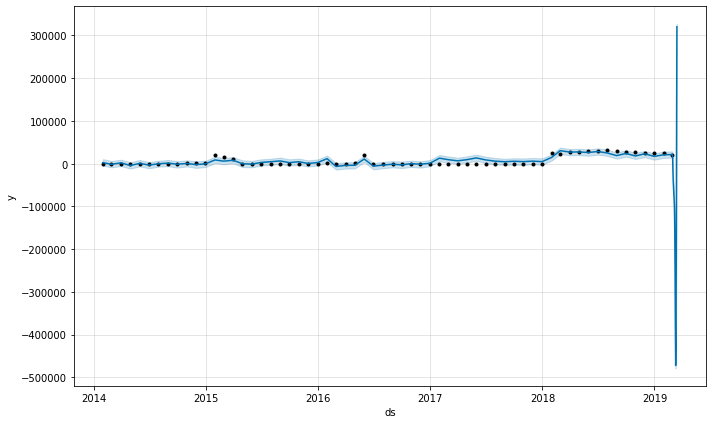

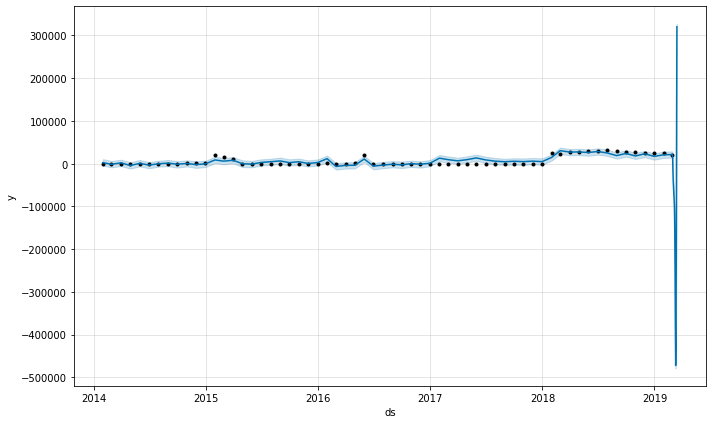

In [35]:
m.plot(prediction)


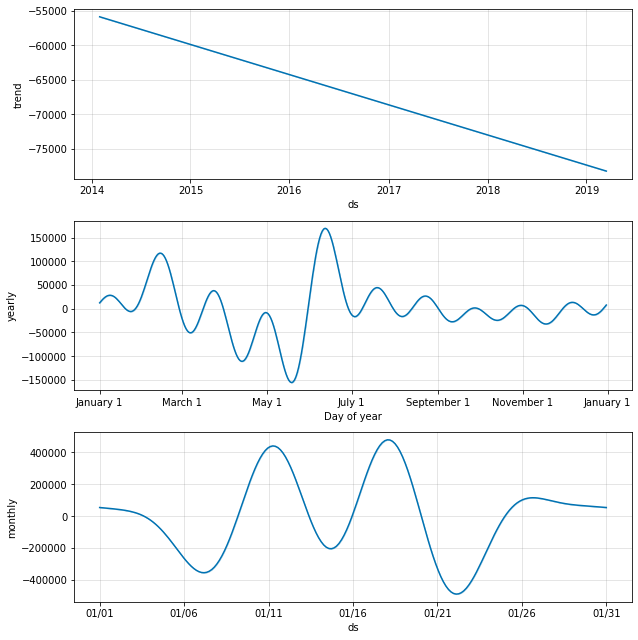

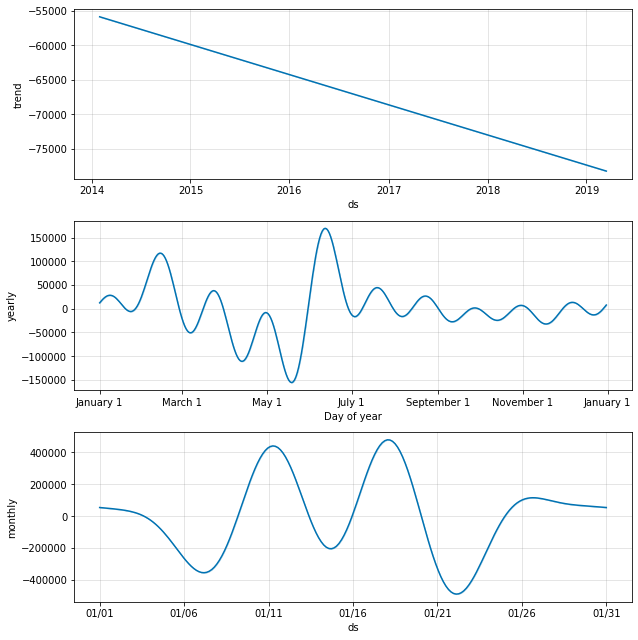

In [36]:
m.plot_components(prediction)

In [37]:
test

,ds,y
62,2019-03-31,24339
63,2019-04-30,19900
64,2019-05-31,85
65,2019-06-30,107
66,2019-07-31,107
67,2019-08-31,118
68,2019-09-30,138
69,2019-10-31,202
70,2019-11-30,277
71,2019-12-31,554


In [38]:
test['dates'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
test

,ds,y,dates
62,2019-03-31,24339,2019-03-31
63,2019-04-30,19900,2019-04-30
64,2019-05-31,85,2019-05-31
65,2019-06-30,107,2019-06-30
66,2019-07-31,107,2019-07-31
67,2019-08-31,118,2019-08-31
68,2019-09-30,138,2019-09-30
69,2019-10-31,202,2019-10-31
70,2019-11-30,277,2019-11-30
71,2019-12-31,554,2019-12-31


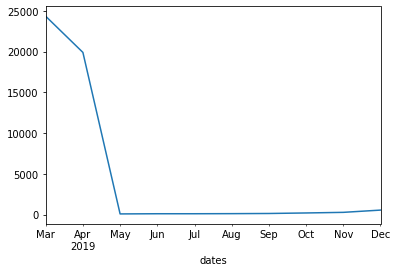

In [40]:
test = test.set_index("dates")
test = test['y']
import matplotlib.pyplot as plt
test.plot()

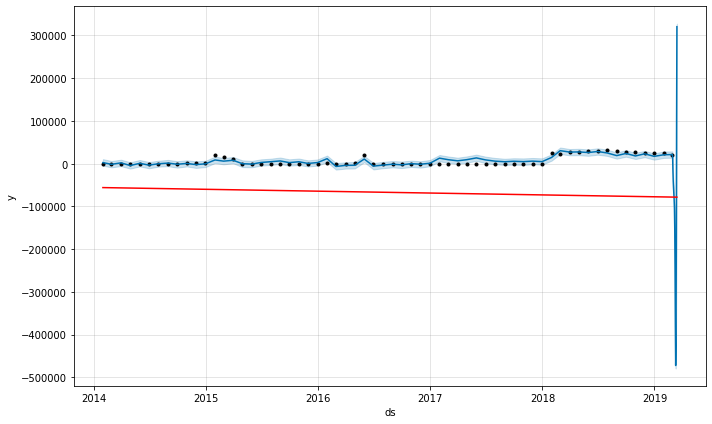

In [41]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)